# Import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import missingno as msno

# Load

In [2]:
# 讀資料
train = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')
sample = pd.read_csv("/kaggle/input/playground-series-s5e5/sample_submission.csv")

# Data Informations & Cleaning

In [3]:
train.shape

(750000, 9)

In [4]:
test.shape

(250000, 8)

In [5]:
sample.shape

(250000, 2)

In [6]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [7]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [8]:
sample.head()

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283


In [9]:
def over_view(df,name = "dataframe"):
    print(f"\n{name.upper()} - Basic Info")
    display(df.info())
    display(df.describe(include = "all").T)
over_view(train,"train")
over_view(test,"test")


TRAIN - Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,750000.0,NaN,NaN,NaN,374999.5,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
Sex,750000,2,female,375721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,750000.0,NaN,NaN,NaN,41.420404,15.175049,20.0,28.0,40.0,52.0,79.0
Height,750000.0,NaN,NaN,NaN,174.697685,12.824496,126.0,164.0,174.0,185.0,222.0
Weight,750000.0,NaN,NaN,NaN,75.145668,13.982704,36.0,63.0,74.0,87.0,132.0
Duration,750000.0,NaN,NaN,NaN,15.421015,8.354095,1.0,8.0,15.0,23.0,30.0
Heart_Rate,750000.0,NaN,NaN,NaN,95.483995,9.449845,67.0,88.0,95.0,103.0,128.0
Body_Temp,750000.0,NaN,NaN,NaN,40.036253,0.779875,37.1,39.6,40.3,40.7,41.5
Calories,750000.0,NaN,NaN,NaN,88.282781,62.395349,1.0,34.0,77.0,136.0,314.0



TEST - Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,250000.0,NaN,NaN,NaN,874999.5,72168.927986,750000.0,812499.75,874999.5,937499.25,999999.0
Sex,250000,2,female,125281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,250000.0,NaN,NaN,NaN,41.452464,15.177769,20.0,28.0,40.0,52.0,79.0
Height,250000.0,NaN,NaN,NaN,174.725624,12.822039,127.0,164.0,174.0,185.0,219.0
Weight,250000.0,NaN,NaN,NaN,75.147712,13.979513,39.0,63.0,74.0,87.0,126.0
Duration,250000.0,NaN,NaN,NaN,15.415428,8.349133,1.0,8.0,15.0,23.0,30.0
Heart_Rate,250000.0,NaN,NaN,NaN,95.479084,9.450161,67.0,88.0,95.0,103.0,128.0
Body_Temp,250000.0,NaN,NaN,NaN,40.036093,0.778448,37.1,39.6,40.3,40.6,41.5


In [10]:
# 合併
combined = pd.concat([train, test], ignore_index=True)

In [11]:
combined

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
999995,999995,female,56,159.0,62.0,6.0,85.0,39.4,NaN
999996,999996,male,32,202.0,101.0,3.0,84.0,38.4,NaN
999997,999997,female,31,164.0,64.0,14.0,98.0,40.1,NaN
999998,999998,female,62,158.0,61.0,25.0,106.0,40.7,NaN


In [12]:
# 辨識重複項
combined.duplicated().sum()

0

In [13]:
# 辨識缺失項
combined.isnull().sum()

id                 0
Sex                0
Age                0
Height             0
Weight             0
Duration           0
Heart_Rate         0
Body_Temp          0
Calories      250000
dtype: int64

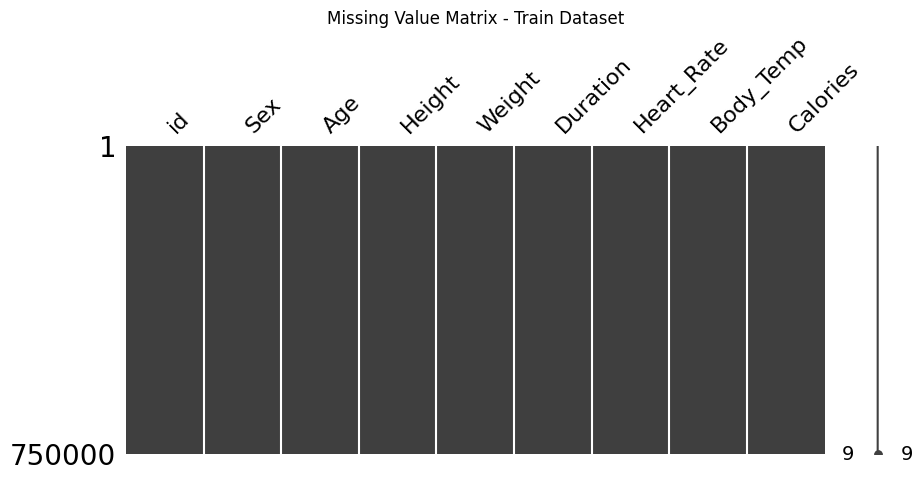

In [14]:
# 辨識缺失項(畫圖)
msno.matrix(train, figsize = (10, 4))
plt.title("Missing Value Matrix - Train Dataset")
plt.show()

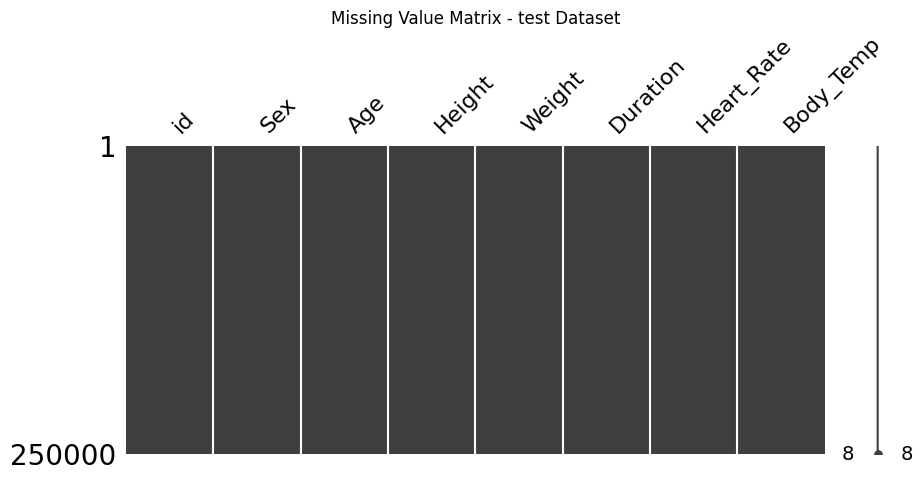

In [15]:
msno.matrix(test, figsize = (10, 4))
plt.title("Missing Value Matrix - test Dataset")
plt.show()

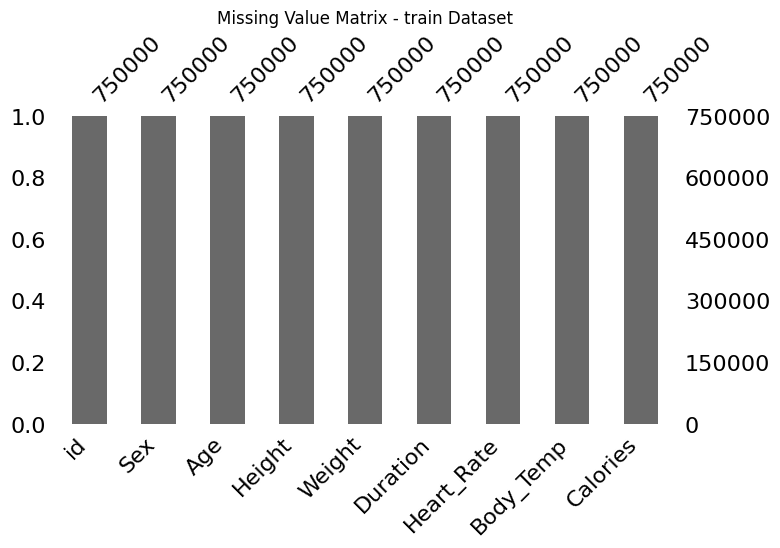

In [16]:
msno.bar(train, figsize = (8, 4))
plt.title("Missing Value Matrix - train Dataset")
plt.show()

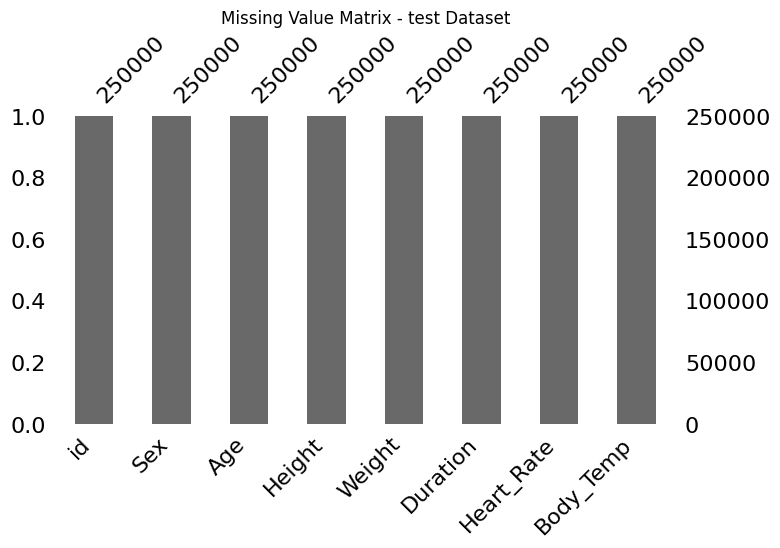

In [17]:
msno.bar(test, figsize = (8, 4))
plt.title("Missing Value Matrix - test Dataset")
plt.show()

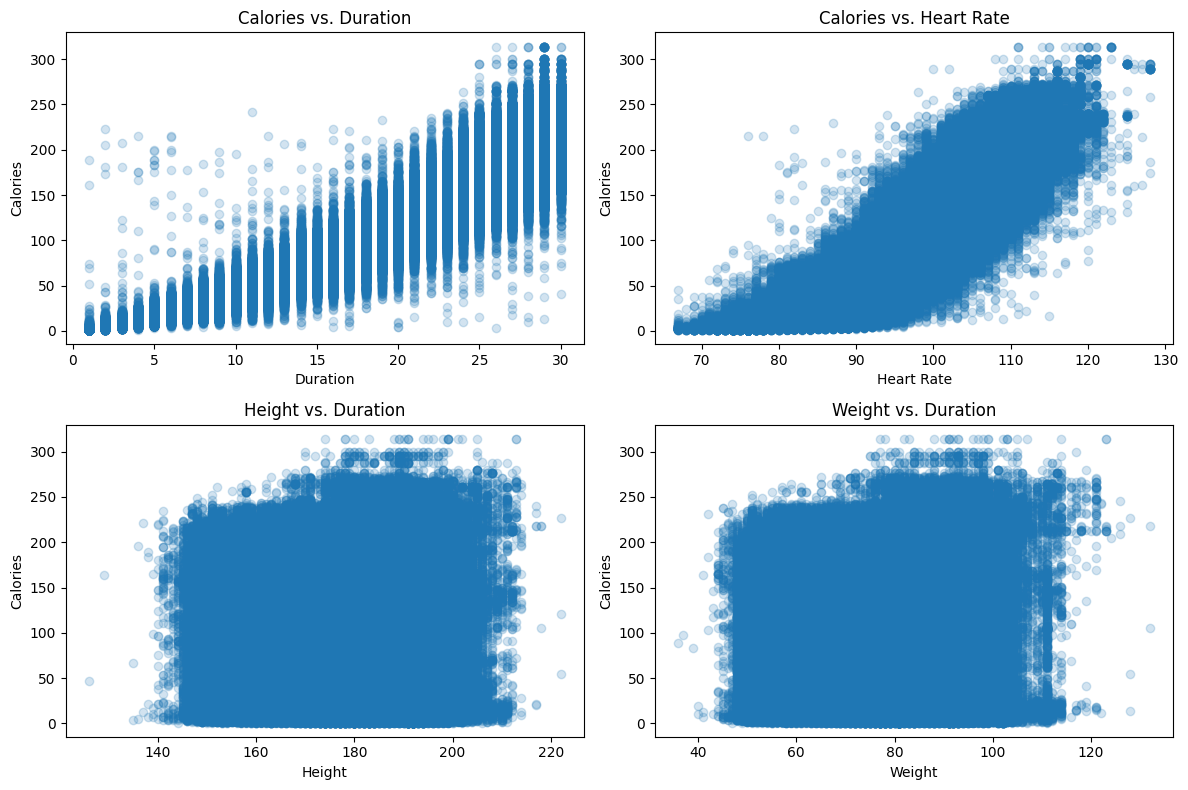

In [18]:
# Create a figure with two side-by-side subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# ----------------------------
# 比較1: 時長 vs 卡路里 
# ----------------------------
axs[0, 0].scatter(
    combined['Duration'],     # x-axis:時長
    combined['Calories'],     # y-axis:卡路里
    alpha=0.2           #點透明圖
)
axs[0, 0].set_xlabel('Duration')       # label x-axis
axs[0, 0].set_ylabel('Calories')       # label y-axis
axs[0, 0].set_title('Calories vs. Duration')

# ----------------------------
# 比較2: 心律 vs 卡路里
# ----------------------------
axs[0, 1].scatter(
    combined['Heart_Rate'],   # x-axis:心律
    combined['Calories'],     # y-axis:卡路里
    alpha=0.2          
)
axs[0, 1].set_xlabel('Heart Rate')   
axs[0, 1].set_ylabel('Calories')     
axs[0, 1].set_title('Calories vs. Heart Rate')

# ----------------------------
# 比較3:  高度 vs 卡路里
# ----------------------------
axs[1, 0].scatter(
    combined['Height'],     # x-axis:高度
    combined['Calories'],     # y-axis:卡路里
    alpha=0.2           #點透明圖
)
axs[1, 0].set_xlabel('Height')       # label x-axis
axs[1, 0].set_ylabel('Calories')       # label y-axis
axs[1, 0].set_title('Height vs. Duration')


# ----------------------------
# 比較4: 體重 vs 卡路里
# ----------------------------
axs[1, 1].scatter(
    combined['Weight'],     # x-axis:體重
    combined['Calories'],     # y-axis:卡路里
    alpha=0.2           #點透明圖
)
axs[1, 1].set_xlabel('Weight')       # label x-axis
axs[1, 1].set_ylabel('Calories')       # label y-axis
axs[1, 1].set_title('Weight vs. Duration')

# Adjust layout so titles/labels don’t overlap, then display
plt.tight_layout()
plt.show()